In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
%matplotlib inline

# **Data Cleaning**

In [ ]:
df = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2001204.csv',header=2)
df = df.drop(columns=["Indicator Code",'1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971'
, '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986'
, '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2020', 'Unnamed: 65'])
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,...,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD coun...,Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CEB,CHE,CHI,CHL,CHN,CIV,...,SYC,SYR,TCA,TCD,TEA,TEC,TGO,THA,TJK,TKM,TLA,TLS,TMN,TON,TSA,TSS,TTO,TUN,TUR,TUV,TZA,UGA,UKR,UMC,URY,USA,UZB,VCT,VEN,VGB,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),...,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$)
2000,1.87345e+09,NaN,9.12959e+09,3.48036e+09,1.42905e+09,7.35685e+11,1.04337e+11,2.84204e+11,1.91156e+09,NaN,8.2637e+08,4.15223e+11,1.968e+11,5.27262e+09,8.70486e+08,2.36205e+11,3.51125e+09,2.95675e+09,5.33698e+10,1.32458e+10,9.0629e+09,8.07647e+09,5.50589e+09,1.27369e+10,8.3205e+08,3.48022e+09,8.39791e+09,6.55421e+11,3.0595e+09,6.00115e+09,4.24464e+08,5.78833e+09,9.145e+08,7.42295e+11,4.28026e+11,2.72055e+11,6.4397e+09,7.78609e+10,1.21135e+12,1.0717e+10,...,6.1488e+08,1.93259e+10,NaN,1.38506e+09,1.73418e+12,8.9355e+11,1.48819e+09,1.26392e+11,8.60521e+08,2.90466e+09,2.17734e+12,3.67088e+08,4.4731e+11,2.0485e+08,6.30429e+11,4.00343e+11,8.15434e+09,2.14732e+10,2.74303e+11,1.37421e+07,1.3376e+10,6.19325e+09,3.12615e+10,4.61256e+12,2.28233e+10,1.02523e+13,1.37605e+10,3.96261e+08,1.17141e+11

In [ ]:
df.dtypes

0      object
1      object
2      object
3      object
4      object
        ...  
259    object
260    object
261    object
262    object
263    object
Length: 264, dtype: object

In [ ]:
df.shape

(264, 23)

In [ ]:
df = df.fillna(df.iloc[3:].mean(axis=0))
df = df.transpose()
df

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),1.87345e+09,1.92011e+09,1.94134e+09,2.02123e+09,2.22849e+09,2.33073e+09,2.42458e+09,2.61508e+09,2.74525e+09,2.49888e+09,2.3905e+09,2.54972e+09,2.53464e+09,2.70168e+09,2.76536e+09,2.91955e+09,2.96592e+09,3.05642e+09,2.47127e+09,2.47127e+09
1,Afghanistan,AFG,GDP (current US$),1.38012e+10,1.38012e+10,4.05518e+09,4.51556e+09,5.22678e+09,6.20914e+09,6.97129e+09,9.74788e+09,1.01092e+10,1.24391e+10,1.58566e+10,1.78043e+10,2.00016e+10,2.05611e+10,2.04849e+10,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10,1.92911e+10
2,Angola,AGO,GDP (current US$),9.12959e+09,8.93606e+09,1.52856e+10,1.78127e+10,2.35521e+10,3.69709e+10,5.2381e+10,6.52665e+10,8.85386e+10,7.03072e+10,8.37995e+10,1.1179e+11,1.28053e+11,1.3671e+11,1.45712e+11,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11,8.88157e+10
3,Albania,ALB,GDP (current US$),3.48036e+09,3.9221e+09,4.34807e+09,5.61149e+09,7.18468e+09,8.05208e+09,8.89607e+09,1.06773e+10,1.28814e+10,1.20442e+10,1.19269e+10,1.28908e+10,1.23198e+10,1.27762e+10,1.32281e+10,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10,1.52792e+10
4,Andorra,AND,GDP (current US$),1.42905e+09,1.54693e+09,1.75591e+09,2.36173e+09,2.89492e+09,3.15991e+09,3.45644e+09,3.9526e+09,4.08563e+09,3.67441e+09,3.44997e+09,3.6292e+09,3.18881e+09,3.1937e+09,3.27181e+09,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09,3.15406e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),1.8492e+09,2.53533e+09,2.40627e+09,2.79046e+09,3.55676e+09,3.6631e+09,3.84682e+09,4.6559e+09,5.68742e+09,5.65379e+09,5.83587e+09,6.7017e+09,6.49981e+09,7.07478e+09,7.39671e+09,6.44292e+09,6.71917e+09,7.24571e+09,7.94296e+09,7.92613e+09
260,"Yemen, Rep.",YEM,GDP (current US$),9.65244e+09,9.86156e+09,1.06946e+10,1.1778e+10,1.38728e+10,1.67463e+10,1.9062e+10,2.16505e+10,2.69109e+10,2.51303e+10,3.09067e+10,3.27264e+10,3.54013e+10,4.04152e+10,4.32065e+10,4.24506e+10,3.0936e+10,2.67361e+10,2.34863e+10,2.25811e+10
261,South Africa,ZAF,GDP (current US$),1.36361e+11,1.21515e+11,1.15482e+11,1.75257e+11,2.2859e+11,2.57773e+11,2.71638e+11,2.99416e+11,2.8677e+11,2.95936e+11,3.75349e+11,4.16419e+11,3.96333e+11,3.66829e+11,3.50905e+11,3.17621e+11,2.96357e+11,3.49554e+11,3.68289e+11,3.51432e+11
262,Zambia,ZMB,GDP (current US$),3.60068e+09,4.09448e+09,4.19385e+09,4.90184e+09,6.22108e+09,8.33187e+09,1.27569e+10,1.4057e+10,1.79109e+10,1.53283e+10,2.02656e+10,2.34595e+10,2.55031e+10,2.80456e+10,2.71507e+10,2.12433e+10,2.09548e+10,2.58682e+10,2.63121e+10,2.33098e+10


In [ ]:
df2 = pd.read_csv('tax-revenue-share-gdp-oecd-grsd.csv')
df2

,Entity,Code,Year,Total tax (% of GDP) (OECD (2018))
0,Africa,NaN,2000,13.147724
1,Africa,NaN,2001,13.832754
2,Africa,NaN,2002,14.257860
3,Africa,NaN,2003,14.578921
4,Africa,NaN,2004,15.109871
...,...,...,...,...
2078,Venezuela,VEN,2011,13.446792
2079,Venezuela,VEN,2012,14.112537
2080,Venezuela,VEN,2013,14.424112
2081,Venezuela,VEN,2014,17.920904


In [ ]:
df2a = df2['Year'] >= 2000
newdf2 = df2[df2a]
newdf2.reset_index()

,index,Entity,Code,Year,Total tax (% of GDP) (OECD (2018))
0,0,Africa,NaN,2000,13.147724
1,1,Africa,NaN,2001,13.832754
2,2,Africa,NaN,2002,14.257860
3,3,Africa,NaN,2003,14.578921
4,4,Africa,NaN,2004,15.109871
...,...,...,...,...,...
1431,2078,Venezuela,VEN,2011,13.446792
1432,2079,Venezuela,VEN,2012,14.112537
1433,2080,Venezuela,VEN,2013,14.424112
1434,2081,Venezuela,VEN,2014,17.920904


In [ ]:
df3 = pd.read_csv('download_transactions_map.csv')

In [ ]:
df3

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,25-Mar-15,25-Sep-15,cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,56900000.0
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,30-Mar-15,25-Sep-15,cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.0,116000000.0
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,5-Jul-12,5-Jul-12,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,5000.0
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,20-Jun-12,20-Jun-12,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,9990.0
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,31-May-12,31-May-12,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,243956,2804,deutsche-bank-ag,Deutsche Bank AG,22-Aug-16,22-Aug-16,ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1.0,20400000.0
4503,243957,2804,deutsche-bank-ag,Deutsche Bank AG,16-Aug-16,16-Aug-16,rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1.0,23000000.0
4504,243958,2804,deutsche-bank-ag,Deutsche Bank AG,16-Aug-16,16-Aug-16,ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1.0,23416000.0
4505,243959,2804,deutsche-bank-ag,Deutsche Bank AG,14-Jun-16,14-Jun-16,rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1.0,33300000.0


In [ ]:
country = df3['originator_bank_country'].value_counts()
newcountry = country.head(15)


# **Data Visualizaiton**




### **Question 1**

Text(0.5, 1.0, 'Amount of Suspicious Transaction Cases of different Originator Countries from 2000-2017')

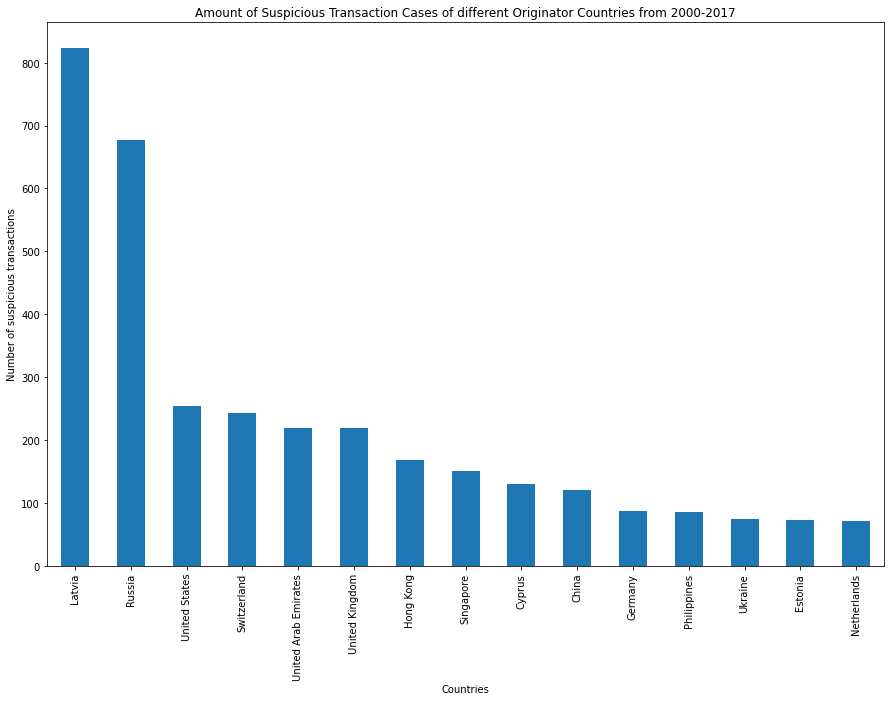

In [ ]:
ax = newcountry.plot.bar(x='originator_bank_country', y='amount_transactions', figsize=(15,10))
ax.set_ylabel('Number of suspicious transactions')
ax.set_xlabel('Countries')
ax.set_title('Amount of Suspicious Transaction Cases of different Originator Countries from 2000-2017')

Text(0.5, 1.0, 'Amount of Suspicious Transaction Cases of different beneficiary Countries from 2000-2017')

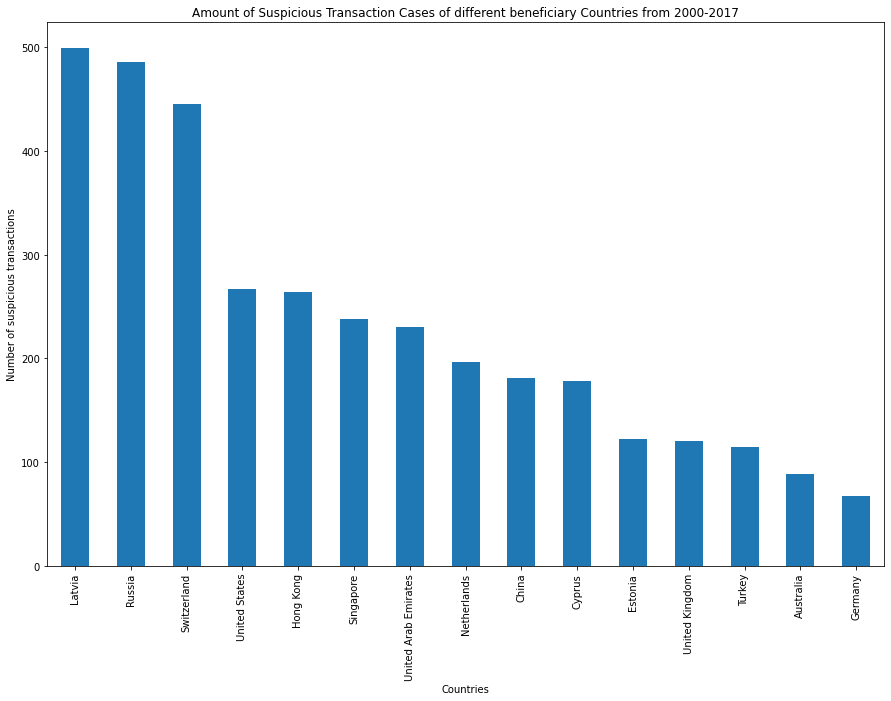

In [ ]:
bencountry = df3['beneficiary_bank_country'].value_counts()
newbencountry = bencountry.head(15)
ax = newbencountry.plot.bar(x='beneficiary_bank_country', y='amount_transactions', figsize=(15,10))
ax.set_ylabel('Number of suspicious transactions')
ax.set_xlabel('Countries')
ax.set_title('Amount of Suspicious Transaction Cases of different beneficiary Countries from 2000-2017')

In [ ]:
df3[["day", "mm", "year"]] = df3["begin_date"].str.split("-", expand=True)
df3['year'] = pd.to_numeric(df3["year"], errors = 'coerce')
df3.dtypes

id                            int64
icij_sar_id                   int64
filer_org_name_id            object
filer_org_name               object
begin_date                   object
end_date                     object
originator_bank_id           object
originator_bank              object
originator_bank_country      object
originator_iso               object
beneficiary_bank_id          object
beneficiary_bank             object
beneficiary_bank_country     object
beneficiary_iso              object
number_transactions         float64
amount_transactions         float64
day                          object
mm                           object
year                        float64
dtype: object

Text(0.5, 1.0, 'Amount of Suspicious Transaction Cases per year from 2000-2017')

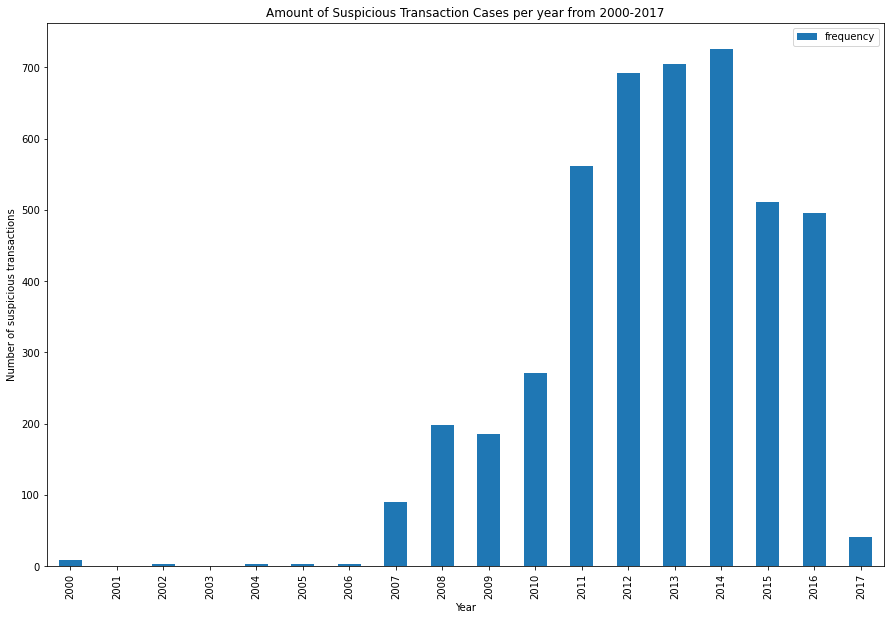

In [ ]:
year = df3["year"].value_counts()
year.index.name = 'year'
year.sort_index(inplace=True)
year2 = year.index
year2 = year2.to_frame()
year = year.to_frame()
year.columns = ["frequency"]
year['years'] = year2['year']
for index in year.index:
    if year.loc[index,'years'] == 0:
      year.loc[index,'years'] = '2000'
    elif year.loc[index,'years'] == 1:
      year.loc[index,'years'] = '2001'
    elif year.loc[index,'years'] == 2:
      year.loc[index,'years'] = '2002'
    elif year.loc[index,'years'] == 4:
      year.loc[index,'years'] = '2004'
    elif year.loc[index,'years']==5:
      year.loc[index,'years'] = '2005'
    elif year.loc[index,'years']==6:
      year.loc[index,'years'] = '2006'
    elif year.loc[index,'years']==7:
      year.loc[index,'years'] = '2007'
    elif year.loc[index,'years']==8:
      year.loc[index,'years'] = '2008'
    elif year.loc[index,'years']==9:
      year.loc[index,'years'] = '2009'
    elif year.loc[index,'years']==10:
      year.loc[index,'years'] = '2010'
    elif year.loc[index,'years']==11:
      year.loc[index,'years'] = '2011'
    elif year.loc[index,'years']==12:
      year.loc[index,'years'] = '2012'
    elif year.loc[index,'years']==13:
      year.loc[index,'years'] = '2013'
    elif year.loc[index,'years']==14:
      year.loc[index,'years'] = '2014'
    elif year.loc[index,'years']==15:
      year.loc[index,'years'] = '2015'
    elif year.loc[index,'years']==16:
      year.loc[index,'years'] = '2016'
    elif year.loc[index,'years'] == 17:
      year.loc[index,'years'] = '2017'
new_row = {'frequency' : 0 , 'years' : '2003'}
year = year.append(new_row, ignore_index=True)
year.reset_index(drop=True, inplace=True)
year['years'] = year['years'].astype(int)  
year.sort_values(by=['years'], inplace = True)
ax2 = year.plot.bar(x='years',figsize=(15,10))
ax2.set_ylabel('Number of suspicious transactions')
ax2.set_xlabel('Year')
ax2.set_title('Amount of Suspicious Transaction Cases per year from 2000-2017')


### **Question 2**

In [ ]:
newcountries = newcountry.index
top15countries = newcountries.to_frame()
top15countries.columns = ['Country Name']
for index in df.index:
	if df.loc[index,'Country Name']=='Hong Kong SAR, China':
		df.loc[index,'Country Name'] = 'Hong Kong'
	elif df.loc[index,'Country Name']=='Russian Federation':
		df.loc[index,'Country Name'] = 'Russia'
new = top15countries.merge( df, how = "inner", on=["Country Name"])
new.drop(columns=["2018","2019"], inplace = True)
new2 = new.transpose()
new2["total gdp"] = new2.iloc[3:].sum(axis=1)
new2
countries = country.index
allcountries = countries.to_frame()
allcountries.columns = ['Country Name']
newA = allcountries.merge( df, how = "inner", on=["Country Name"])
newA = newA.transpose()
newA["total gdp"] = newA.iloc[3:].sum(axis=1)
new2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,total gdp
Country Name,Latvia,Russia,United States,Switzerland,United Arab Emirates,United Kingdom,Hong Kong,Singapore,Cyprus,China,Germany,Philippines,Ukraine,Estonia,Netherlands,NaN
Country Code,LVA,RUS,USA,CHE,ARE,GBR,HKG,SGP,CYP,CHN,DEU,PHL,UKR,EST,NLD,NaN
Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),NaN
2000,7.94925e+09,2.5971e+11,1.02523e+13,2.72055e+11,1.04337e+11,1.65782e+12,1.71668e+11,9.60745e+10,9.98584e+09,1.21135e+12,1.94315e+12,8.36703e+10,3.12615e+10,5.69407e+09,4.16443e+11,1.652350e+13
2001,8.35142e+09,3.06602e+11,1.05818e+13,2.78631e+11,1.03312e+11,1.64025e+12,1.69403e+11,8.97949e+10,1.03979e+10,1.3394e+12,1.94411e+12,7.89211e+10,3.79723e+10,6.25926e+09,4.31213e+11,1.702643e+13
2002,9.54517e+09,3.4547e+11,1.09364e+13,3.01417e+11,1.09816e+11,1.78447e+12,1.66349e+11,9.25378e+10,1.14202e+10,1.47055e+12,2.06862e+12,8.43074e+10,4.23516e+10,7.37246e+09,4.71614e+11,1.790227e+13
2003,1.17495e+10,4.30348e+11,1.14582e+13,3.52915e+11,1.24346e+11,2.05302e+12,1.61385e+11,9.76454e+10,1.45473e+10,1.66029e+12,2.49613e+12,8.70391e+10,5.00842e+10,9.87764e+09,5.78792e+11,1.958641e+13
2004,1.44019e+10,5.91017e+11,1.22137e+13,3.94164e+11,1.47824e+11,2.41693e+12,1.691e+11,1.15035e+11,1.73206e+10,1.95535e+12,2.80919e+12,9.5002e+10,6.48197e+10,1.21444e+10,6.57172e+11,2.167320e+13
2005,1.69593e+10,7.64017e+11,1.30366e+13,4.08689e+11,1.80617e+11,2.53868e+12,1.8157e+11,1.27808e+11,1.84334e+10,2.28597e+12,2.8458e+12,1.0742e+11,8.60579e+10,1.40983e+10,6.85093e+11,2.329785e+13
2006,2.15174e+10,9.89931e+11,1.38146e+13,4.30921e+11,2.22117e+11,2.71375e+12,1.93536e+11,1.4863e+11,2.00728e+10,2.75213e+12,2.9922e+12,1.27653e+11,1.07648e+11,1.70123e+10,7.33341e+11,2.528507e+13


,frequency,years,total transaction amount
frequency,1.000000,0.721818,0.910444
years,0.721818,1.000000,0.692436
total transaction amount,0.910444,0.692436,1.000000


,frequency,years,total transaction amount
0,9,2000,5.700446e+06
1,1,2001,7.769890e+03
2,3,2002,9.402000e+03
17,0,2003,0.000000e+00
3,3,2004,5.451500e+07
4,3,2005,3.024195e+07
5,3,2006,9.127150e+07
6,91,2007,1.427567e+09
7,199,2008,1.468677e+09
8,186,2009,2.188356e+08


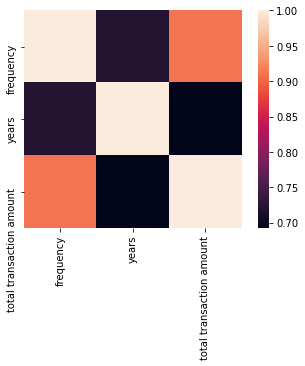

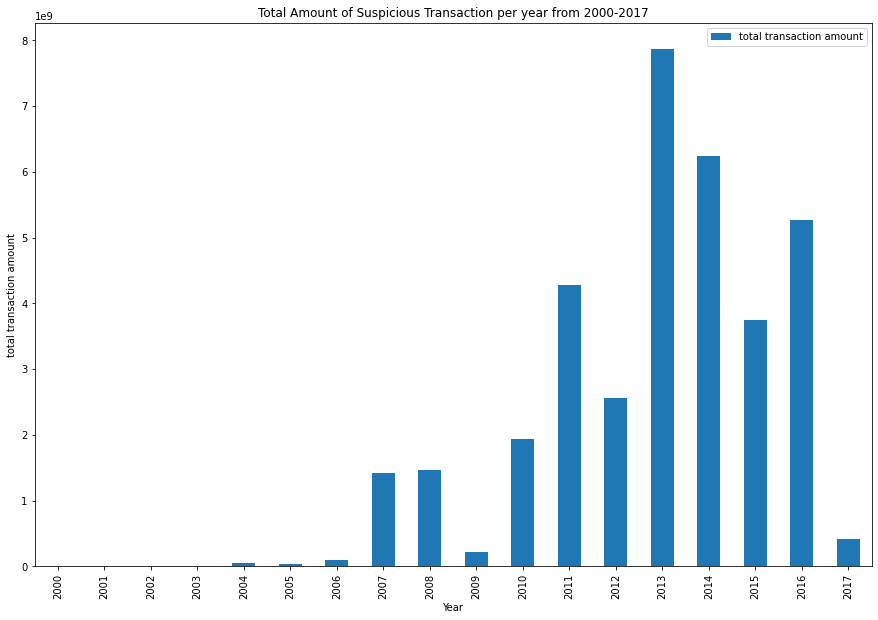

In [ ]:
amount2017 = (df3["year"] == 17)
a2017 = df3[amount2017]
total2017 = a2017["amount_transactions"].sum()
amount2016 = (df3["year"] == 16)
a2016 = df3[amount2016]
total2016 = a2016["amount_transactions"].sum()
amount2015 = (df3["year"] == 15)
a2015 = df3[amount2015]
total2015 = a2015["amount_transactions"].sum()
amount2014 = (df3["year"] == 14)
a2014 = df3[amount2014]
total2014 = a2014["amount_transactions"].sum()
amount2013 = (df3["year"] == 13)
a2013 = df3[amount2013]
total2013 = a2013["amount_transactions"].sum()
amount2012 = (df3["year"] == 12)
a2012 = df3[amount2012]
total2012 = a2012["amount_transactions"].sum()
amount2011 = (df3["year"] == 11)
a2011 = df3[amount2011]
total2011 = a2011["amount_transactions"].sum()
amount2010 = (df3["year"] == 10)
a2010 = df3[amount2010]
total2010 = a2010["amount_transactions"].sum()
amount2009 = (df3["year"] == 9)
a2009 = df3[amount2009]
total2009 = a2009["amount_transactions"].sum()
amount2008 = (df3["year"] == 8)
a2008 = df3[amount2008]
total2008 = a2008["amount_transactions"].sum()
amount2007 = (df3["year"] == 7)
a2007 = df3[amount2007]
total2007 = a2007["amount_transactions"].sum()
amount2006 = (df3["year"] == 6)
a2006 = df3[amount2006]
total2006 = a2006["amount_transactions"].sum()
amount2005 = (df3["year"] == 5)
a2005 = df3[amount2005]
total2005 = a2005["amount_transactions"].sum()
amount2004 = (df3["year"] == 4)
a2004 = df3[amount2004]
total2004 = a2004["amount_transactions"].sum()
amount2003 = (df3["year"] == 3)
a2003 = df3[amount2003]
total2003 = a2003["amount_transactions"].sum()
amount2002 = (df3["year"] == 2)
a2002 = df3[amount2002]
total2002 = a2002["amount_transactions"].sum()
amount2001 = (df3["year"] == 1)
a2001 = df3[amount2001]
total2001 = a2001["amount_transactions"].sum()
amount2000 = (df3["year"] == 0)
a2000 = df3[amount2000]
total2000 = a2000["amount_transactions"].sum()
totaltransactionamount = [total2000 , total2001 ,total2002, total2003 ,total2004, total2005, total2006, total2007, total2008, total2009, total2010, total2011, total2012, total2013, total2014, total2015, total2016, total2017]
year["total transaction amount"]=totaltransactionamount
cor3 = year.corr()
display(cor3)
sns.heatmap(cor3, square = True)
ax3 = year.plot.bar(x='years', y="total transaction amount",figsize=(15,10))
ax3.set_ylabel('total transaction amount')
ax3.set_xlabel('Year')
ax3.set_title('Total Amount of Suspicious Transaction per year from 2000-2017')
year


,total gdp,years,frequency
total gdp,1.000000,0.976464,0.782666
years,0.976464,1.000000,0.721818
frequency,0.782666,0.721818,1.000000


,total gdp,years,frequency
0,3.078334e+13,2000,9
1,3.075028e+13,2001,1
2,3.217011e+13,2002,3
3,3.612152e+13,2003,0
4,4.042107e+13,2004,3
5,4.338133e+13,2005,3
6,4.670111e+13,2006,3
7,5.233253e+13,2007,91
8,5.725485e+13,2008,199
9,5.423719e+13,2009,186


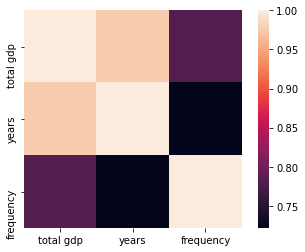

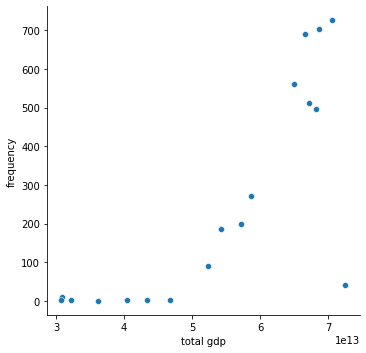

In [ ]:

new3 = newA["total gdp"].iloc[3:]
new3 = new3.to_frame()
new4 = new3.index
new4.to_frame()
new3["years"] = new4
new3.reset_index(drop=True, inplace=True)
new3['years'] = new3['years'].astype(int)    
new4 = new3.merge(year, how = "inner", on=["years"])
new4.drop(columns=["total transaction amount"], inplace = True)
cor1 = new4.corr()
display(cor1)
sns.heatmap(cor1, square = True)
sns.relplot(x="total gdp", y="frequency", data=new4, sizes=(15, 30))

new4

### **Question 3**

In [ ]:
new2a = new2.drop(columns = ["total gdp"])
new2a = new2a.transpose()
new2a["total gdp of countries"] = new2a.iloc[ : , 3: ].sum(axis=1)
new2a.sort_values(by=["total gdp of countries"], ascending = False, inplace = True)
new2a.reset_index(drop = True)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,total gdp of countries
0,United States,USA,GDP (current US$),1.02523e+13,1.05818e+13,1.09364e+13,1.14582e+13,1.22137e+13,1.30366e+13,1.38146e+13,1.44519e+13,1.47128e+13,1.44489e+13,1.49921e+13,1.55426e+13,1.6197e+13,1.67848e+13,1.75272e+13,1.82247e+13,1.8715e+13,1.95194e+13,2.634101e+14
1,China,CHN,GDP (current US$),1.21135e+12,1.3394e+12,1.47055e+12,1.66029e+12,1.95535e+12,2.28597e+12,2.75213e+12,3.55034e+12,4.59431e+12,5.1017e+12,6.08716e+12,7.5515e+12,8.53223e+12,9.57041e+12,1.04757e+13,1.10616e+13,1.12333e+13,1.23104e+13,1.027436e+14
2,Germany,DEU,GDP (current US$),1.94315e+12,1.94411e+12,2.06862e+12,2.49613e+12,2.80919e+12,2.8458e+12,2.9922e+12,3.42123e+12,3.73003e+12,3.39779e+12,3.39635e+12,3.74441e+12,3.52734e+12,3.73274e+12,3.88392e+12,3.35624e+12,3.4675e+12,3.6826e+12,5.643935e+13
3,United Kingdom,GBR,GDP (current US$),1.65782e+12,1.64025e+12,1.78447e+12,2.05302e+12,2.41693e+12,2.53868e+12,2.71375e+12,3.10088e+12,2.92267e+12,2.41091e+12,2.47524e+12,2.65931e+12,2.70489e+12,2.78602e+12,3.0638e+12,2.92859e+12,2.69428e+12,2.66623e+12,4.521775e+13
4,Russia,RUS,GDP (current US$),2.5971e+11,3.06602e+11,3.4547e+11,4.30348e+11,5.91017e+11,7.64017e+11,9.89931e+11,1.29971e+12,1.66085e+12,1.22264e+12,1.52492e+12,2.04593e+12,2.2083e+12,2.29247e+12,2.05924e+12,1.36348e+12,1.27679e+12,1.5742e+12,2.221561e+13
5,Netherlands,NLD,GDP (current US$),4.16443e+11,4.31213e+11,4.71614e+11,5.78792e+11,6.57172e+11,6.85093e+11,7.33341e+11,8.47482e+11,9.47998e+11,8.68077e+11,8.46555e+11,9.04086e+11,8.38971e+11,8.76924e+11,8.90981e+11,7.65265e+11,7.83528e+11,8.3387e+11,1.337740e+13
6,Switzerland,CHE,GDP (current US$),2.72055e+11,2.78631e+11,3.01417e+11,3.52915e+11,3.94164e+11,4.08689e+11,4.30921e+11,4.79913e+11,5.54363e+11,5.41507e+11,5.83783e+11,6.9958e+11,6.68044e+11,6.88504e+11,7.09183e+11,6.79832e+11,6.71309e+11,6.7995e+11,9.394761e+12
7,United Arab Emirates,ARE,GDP (current US$),1.04337e+11,1.03312e+11,1.09816e+11,1.24346e+11,1.47824e+11,1.80617e+11,2.22117e+11,2.57916e+11,3.15475e+11,2.53547e+11,2.89787e+11,3.50666e+11,3.74591e+11,3.90108e+11,4.03137e+11,3.58135e+11,3.57045e+11,3.85606e+11,4.728382e+12
8,Hong Kong,HKG,GDP (current US$),1.71668e+11,1.69403e+11,1.66349e+11,1.61385e+11,1.691e+11,1.8157e+11,1.93536e+11,2.11597e+11,2.1928e+11,2.14046e+11,2.28638e+11,2.48514e+11,2.62629e+11,2.75697e+11,2.91459e+11,3.09384e+11,3.20838e+11,3.41244e+11,4.136337e+12
9,Singapore,SGP,GDP (current US$),9.60745e+10,8.97949e+10,9.25378e+10,9.76454e+10,1.15035e+11,1.27808e+11,1.4863e+11,1.80942e+11,1.93612e+11,1.94152e+11,2.39809e+11,2.79351e+11,2.95087e+11,3.07576e+11,3.14851e+11,3.08004e+11,3.18652e+11,3.41863e+11,3.741427e+12


In [ ]:
newdf3 = df3[["originator_bank_country", "amount_transactions"]]
USamount = (newdf3["originator_bank_country"] == "United States")
US = newdf3[USamount]
totalUS = US['amount_transactions'].sum()
CNamount = (newdf3["originator_bank_country"] == "China")
China = newdf3[CNamount]
totalCN = China['amount_transactions'].sum()
GMamount = (newdf3["originator_bank_country"] == "Germany")
germany = newdf3[GMamount]
totalGM = germany['amount_transactions'].sum()
UKamount = (newdf3["originator_bank_country"] == "United Kingdom")
UK = newdf3[UKamount]
totalUK = UK['amount_transactions'].sum()
RSamount = (newdf3["originator_bank_country"] == "Russia")
RS = newdf3[RSamount]
totalRS = RS['amount_transactions'].sum()
NTamount = (newdf3["originator_bank_country"] == "Netherlands")
NT = newdf3[NTamount]
totalNT = NT['amount_transactions'].sum()
SWamount = (newdf3["originator_bank_country"] == "Switzerland")
SW = newdf3[SWamount]
totalSW = SW['amount_transactions'].sum()
UAEamount = (newdf3["originator_bank_country"] == "United Arab Emirates")
UAE = newdf3[UAEamount]
totalUAE = UAE['amount_transactions'].sum()
HKamount = (newdf3["originator_bank_country"] == "Hong Kong")
HK = newdf3[HKamount]
totalHK = HK['amount_transactions'].sum()
SGamount = (newdf3["originator_bank_country"] == "Singapore")
SG = newdf3[SGamount]
totalSG = SG['amount_transactions'].sum()
PHamount = (newdf3["originator_bank_country"] == "Philippines")
PH = newdf3[PHamount]
totalPH = PH['amount_transactions'].sum()
UKRamount = (newdf3["originator_bank_country"] == "Ukraine")
UKR = newdf3[UKRamount]
totalUKR = UKR['amount_transactions'].sum()
LVamount = (newdf3["originator_bank_country"] == "Latvia")
LV = newdf3[LVamount]
totalLV = LV['amount_transactions'].sum()
CPamount = (newdf3["originator_bank_country"] == "Cyprus")
CP = newdf3[CPamount]
totalCP = CP['amount_transactions'].sum()
ETamount = (newdf3["originator_bank_country"] == "Estonia")
ET = newdf3[ETamount]
totalET = ET['amount_transactions'].sum()
contryTotal = [totalUS , totalCN, totalGM, totalUK, totalRS, totalNT, totalSW, totalUAE, totalHK, totalSG, totalPH, totalUKR, totalLV, totalCP, totalET]
new2a["country total amount transactions"] = contryTotal
new2b = new2a.drop(columns=["Country Code","Indicator Name"	,"2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"])
new2b.reset_index(drop = True, inplace = True)
new2b

,Country Name,total gdp of countries,country total amount transactions
0,United States,2.634101e+14,1.188987e+09
1,China,1.027436e+14,7.231465e+08
2,Germany,5.643935e+13,2.097573e+08
3,United Kingdom,4.521775e+13,3.607697e+09
4,Russia,2.221561e+13,3.502307e+09
5,Netherlands,1.337740e+13,4.968629e+09
6,Switzerland,9.394761e+12,4.182906e+09
7,United Arab Emirates,4.728382e+12,2.568007e+08
8,Hong Kong,4.136337e+12,1.410444e+09
9,Singapore,3.741427e+12,1.471293e+09


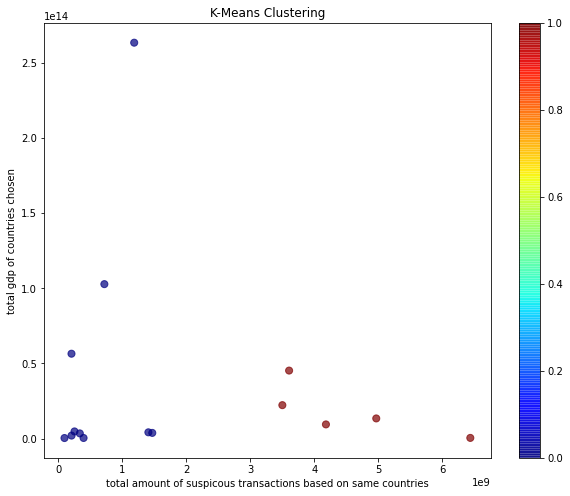

,total gdp of countries,country total amount transactions
total gdp of countries,1.000000,-0.133093
country total amount transactions,-0.133093,1.000000


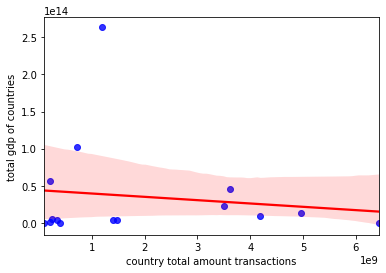

In [ ]:
new2b1 = new2b[["total gdp of countries", "country total amount transactions"]]
ss = StandardScaler()
X = ss.fit_transform(new2b1)
model = KMeans(2, verbose=0)
model.fit(X)
kmeans_labels = pd.DataFrame(model.labels_)  
#new2b.insert((new2b.shape[1]), 'kmeans', kmeans_labels)
v2 = new2b['total gdp of countries']
v1 = new2b['country total amount transactions']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
ax.set_title('K-Means Clustering')
ax.set_xlabel("total amount of suspicous transactions based on same countries")
ax.set_ylabel("total gdp of countries chosen")
plt.colorbar(scatter)
plt.show()
cor2 = new2b1.corr()
display(cor2)
sns.regplot(x="country total amount transactions", y="total gdp of countries", data=new2b,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})


### **Question 4**

In [ ]:
country2 = df3['originator_bank_country'].value_counts()
newcountry2 = country.head(30)

In [ ]:
newcountries2 = newcountry2.index
top30countries = newcountries2.to_frame()
top30countries.columns = ['Entity']
merge2_3 = top30countries.merge( newdf2, how = "inner", on=["Entity"])
merge2_3["Entity"].value_counts()

Netherlands       18
Germany           18
Indonesia         18
Poland            18
Switzerland       18
United States     18
Estonia           18
Kazakhstan        18
Philippines       18
Austria           18
Latvia            18
United Kingdom    18
Turkey            18
Singapore         18
Australia         17
Name: Entity, dtype: int64

In [ ]:
merge2_3a = merge2_3.groupby(['Entity'])['Total tax (% of GDP) (OECD (2018))'].sum() / merge2_3["Total tax (% of GDP) (OECD (2018))"].mean()
print(merge2_3a)

Entity
Australia         17.667579
Austria           27.788493
Estonia           21.129310
Germany           23.641953
Indonesia          7.768194
Kazakhstan        14.635431
Latvia            18.915600
Netherlands       23.914778
Philippines       10.516742
Poland            21.696940
Singapore          8.767628
Switzerland       17.942359
Turkey            16.188317
United Kingdom    21.481612
United States     16.945063
Name: Total tax (% of GDP) (OECD (2018)), dtype: float64


In [ ]:
merge2_3b = pd.DataFrame(merge2_3a)
merge2_3b

,Total tax (% of GDP) (OECD (2018))
Entity,
Australia,17.667579
Austria,27.788493
Estonia,21.129310
Germany,23.641953
Indonesia,7.768194
Kazakhstan,14.635431
Latvia,18.915600
Netherlands,23.914778
Philippines,10.516742


In [ ]:
newdf3 = df3[["originator_bank_country", "amount_transactions"]]
USamount = (newdf3["originator_bank_country"] == "United States")
US = newdf3[USamount]
totalUS = US['amount_transactions'].sum()
AUSamount = (newdf3["originator_bank_country"] == "Australia")
AUS = newdf3[AUSamount]
totalAUS = AUS['amount_transactions'].sum()
ASTamount = (newdf3["originator_bank_country"] == "Austria")
AST = newdf3[ASTamount]
totalAST = AST['amount_transactions'].sum()
INDamount = (newdf3["originator_bank_country"] == "Indonesia")
IND = newdf3[INDamount]
totalIND = IND['amount_transactions'].sum()
KAZamount = (newdf3["originator_bank_country"] == "Kazakhstan")
KAZ = newdf3[KAZamount]
totalKAZ = KAZ['amount_transactions'].sum()
POLamount = (newdf3["originator_bank_country"] == "Poland")
POL = newdf3[POLamount]
totalPOL = POL['amount_transactions'].sum()
TURamount = (newdf3["originator_bank_country"] == "Turkey")
TUR = newdf3[TURamount]
totalTUR = TUR['amount_transactions'].sum()
GMamount = (newdf3["originator_bank_country"] == "Germany")
germany = newdf3[GMamount]
totalGM = germany['amount_transactions'].sum()
UKamount = (newdf3["originator_bank_country"] == "United Kingdom")
UK = newdf3[UKamount]
totalUK = UK['amount_transactions'].sum()
NTamount = (newdf3["originator_bank_country"] == "Netherlands")
NT = newdf3[NTamount]
totalNT = NT['amount_transactions'].sum()
SWamount = (newdf3["originator_bank_country"] == "Switzerland")
SW = newdf3[SWamount]
totalSW = SW['amount_transactions'].sum()
SGamount = (newdf3["originator_bank_country"] == "Singapore")
SG = newdf3[SGamount]
totalSG = SG['amount_transactions'].sum()
PHamount = (newdf3["originator_bank_country"] == "Philippines")
PH = newdf3[PHamount]
totalPH = PH['amount_transactions'].sum()
LVamount = (newdf3["originator_bank_country"] == "Latvia")
LV = newdf3[LVamount]
totalLV = LV['amount_transactions'].sum()
ETamount = (newdf3["originator_bank_country"] == "Estonia")
ET = newdf3[ETamount]
totalET = ET['amount_transactions'].sum()
contryTotal = [totalUS, totalAUS, totalAST, totalIND, totalKAZ, totalPOL, totalTUR, totalGM, totalUK, totalNT, totalSW, totalSG, totalPH, totalLV, totalET]
merge2_3b["country total amount transactions"] = contryTotal
merge2_3b

,Total tax (% of GDP) (OECD (2018)),country total amount transactions
Entity,,
Australia,17.667579,1.188987e+09
Austria,27.788493,1.680031e+08
Estonia,21.129310,5.812701e+08
Germany,23.641953,2.861602e+08
Indonesia,7.768194,8.220929e+07
Kazakhstan,14.635431,3.555305e+08
Latvia,18.915600,7.060668e+07
Netherlands,23.914778,2.097573e+08
Philippines,10.516742,3.607697e+09


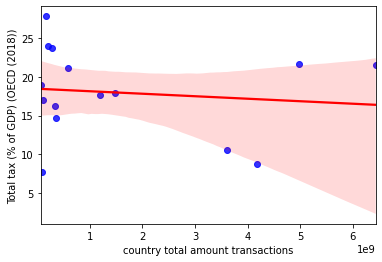

In [ ]:
sns.regplot(x="country total amount transactions", y="Total tax (% of GDP) (OECD (2018))", data=merge2_3b,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

,Total tax (% of GDP) (OECD (2018)),country total amount transactions
Total tax (% of GDP) (OECD (2018)),1.000000,-0.118461
country total amount transactions,-0.118461,1.000000


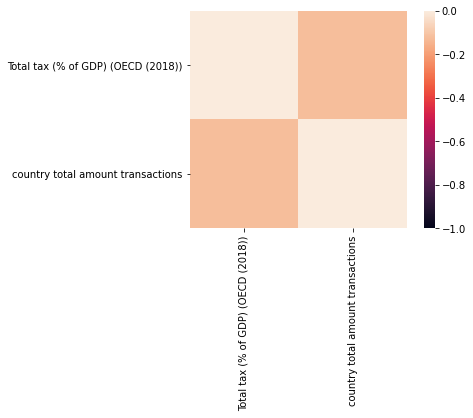

In [ ]:
cor2_3 = merge2_3b.corr()
display(cor2_3)
sns.heatmap(cor2_3, square = True, vmin=-1, vmax=0)